In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
from sklearn.datasets import load_diabetes

In [35]:
dataset_db = load_diabetes()
print(dataset_db['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [36]:
df = pd.DataFrame(dataset_db.data, columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [37]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [38]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


<Axes: >

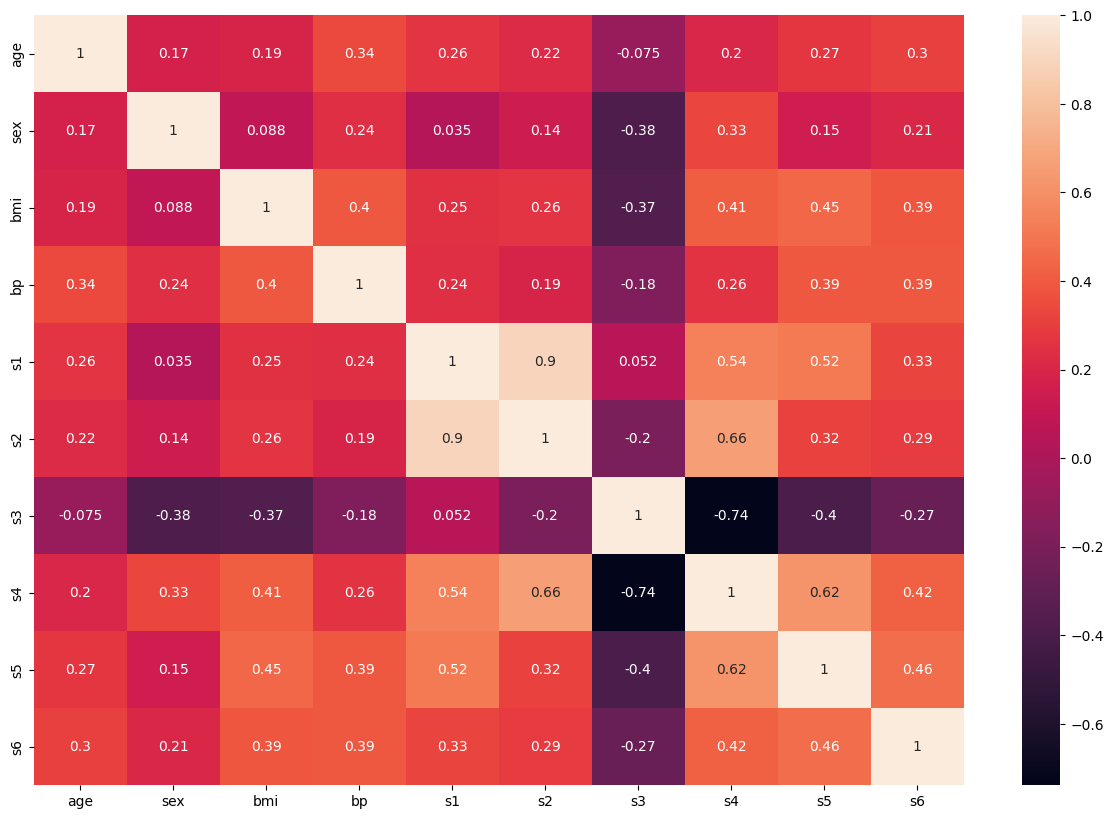

In [39]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [40]:
X = df
y = dataset_db['target']

In [50]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [52]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
y_pred = regressor.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

7436.8646616541355


## Hyperparameter Tuning

In [55]:
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5,10,15,20,30,40,50],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [58]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(regressor, param_grid=params, cv =5, scoring= 'neg_mean_squared_error')


In [59]:
grid.fit(X_train, y_train)

c:\Users\jawad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
440 fits failed out of a total of 1320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
440 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jawad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jawad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [60]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [64]:
best_params = {
'criterion': ['friedman_mse'],
 'max_depth': [4],
 'max_features': ['sqrt'],
 'splitter': ['random']}

In [65]:
grid = GridSearchCV(regressor, param_grid=best_params, cv =5, scoring= 'neg_mean_squared_error')

In [66]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['friedman_mse'], 'max_depth': [4],
                         'max_features': ['sqrt'], 'splitter': ['random']},
             scoring='neg_mean_squared_error')

In [72]:
selectModel = DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, max_features='sqrt', splitter='random')
selectModel.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='sqrt', splitter='random')

In [70]:
y_pred = grid.predict(X_test)
print(mean_squared_error(y_test, y_pred))

4361.8153284061855


In [73]:
y_pred1 = selectModel.predict(X_test)
print(mean_squared_error(y_test, y_pred1))

5218.888104122861


[Text(0.5625, 0.9, 'x[7] <= -0.016\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.3333333333333333, 0.7, 'x[3] <= -0.007\nfriedman_mse = 3134.139\nsamples = 113\nvalue = 110.566'),
 Text(0.44791666666666663, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'x[1] <= -0.001\nfriedman_mse = 1912.667\nsamples = 73\nvalue = 99.068'),
 Text(0.08333333333333333, 0.3, 'x[4] <= -0.089\nfriedman_mse = 2032.377\nsamples = 57\nvalue = 103.614'),
 Text(0.041666666666666664, 0.1, 'friedman_mse = 0.0\nsamples = 1\nvalue = 37.0'),
 Text(0.125, 0.1, 'friedman_mse = 1988.015\nsamples = 56\nvalue = 104.804'),
 Text(0.25, 0.3, 'x[2] <= 0.01\nfriedman_mse = 1150.359\nsamples = 16\nvalue = 82.875'),
 Text(0.20833333333333334, 0.1, 'friedman_mse = 482.347\nsamples = 14\nvalue = 75.286'),
 Text(0.2916666666666667, 0.1, 'friedman_mse = 2601.0\nsamples = 2\nvalue = 136.0'),
 Text(0.5, 0.5, 'x[8] <= -0.051\nfriedman_mse = 4681.747\nsamples = 40\nvalue = 131.55'),
 Text(0.4166666666666667, 0.3

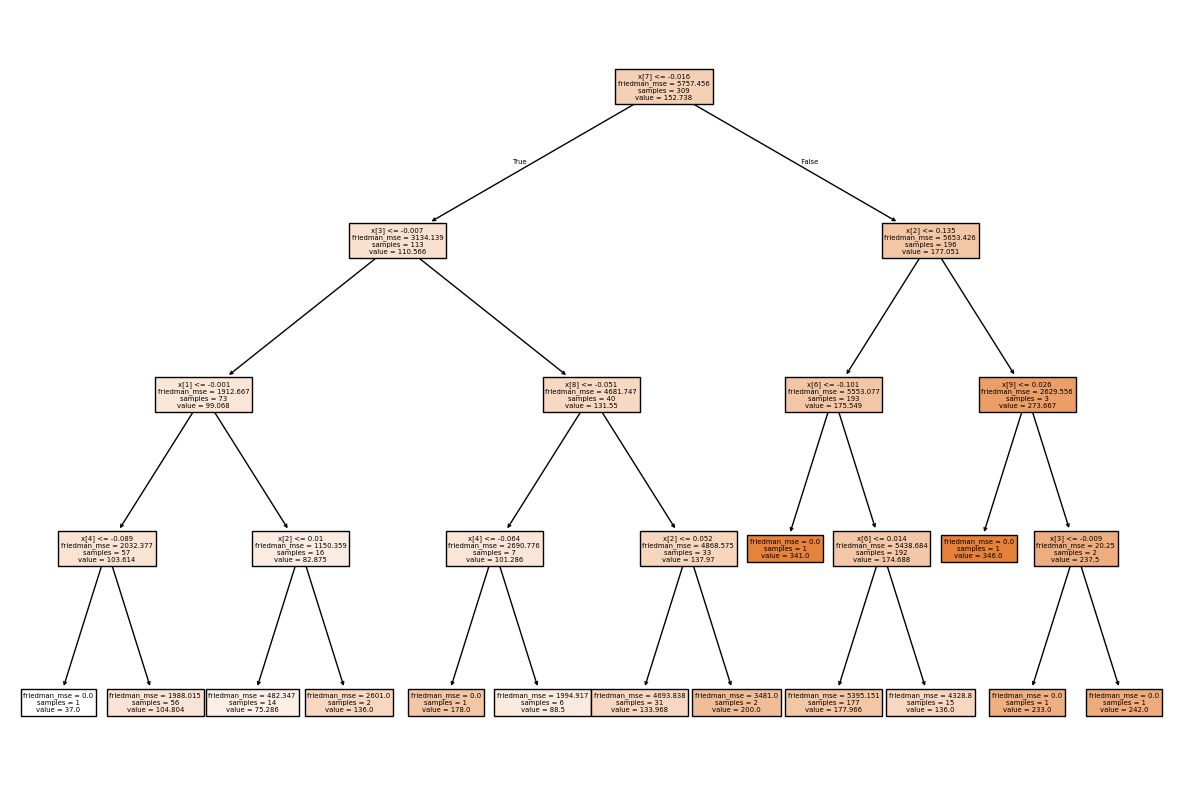

In [74]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(selectModel, filled=True)